<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Projects/Toxic_comment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Comment Classification Challenge

Competition Link: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview
### Identify and classify toxic online comments

Will dig deep and make this notebook annoted tomorrow! 

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi 

Tue Jun  8 09:47:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
# Unzipping toxic comments data
# !unzip /content/drive/MyDrive/data/jigsaw-toxic-comment-classification-challenge.zip -d drive/MyDrive/data/toxic_comments/

In [5]:
#!unzip /content/drive/MyDrive/data/toxic_comments/train.csv.zip -d drive/MyDrive/data/toxic_comments/
#!unzip /content/drive/MyDrive/data/toxic_comments/test.csv.zip -d drive/MyDrive/data/toxic_comments/
#!unzip /content/drive/MyDrive/data/toxic_comments/test_labels.csv.zip -d drive/MyDrive/data/toxic_comments/

In [6]:
data = pd.read_csv('drive/MyDrive/data/toxic_comments/train.csv')
test_data = pd.read_csv('drive/MyDrive/data/toxic_comments/test.csv')

data.shape , test_data.shape

((159571, 8), (153164, 2))

In [7]:
# Getting the labels csv for test data 
test_labels = pd.read_csv('drive/MyDrive/data/toxic_comments/test_labels.csv')
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


## Become one with the data 

In here we will try to get know our data better, if possible perform some EDA and derive insights from this data. 

**Things to do:**
- Get to know different labels and visualize comments from that. 
- Make some plots comparing the number of lables vs the number of comments exists for each group. 
- 

In [8]:
# How many comments are in train_data 
print(f" There are {len(data['comment_text'])} comments text in the train data")

 There are 159571 comments text in the train data


In [9]:
# Is there any missing values? Nope
data.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [10]:
# Let's drop the ID Column since we don't want that 
data = data.drop('id' , axis = 1)
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [11]:
# Are the lables are balanced? 
for col in data.columns[1:]:
  print(col)
  print(data[col].value_counts())
  print('-----------')

toxic
0    144277
1     15294
Name: toxic, dtype: int64
-----------
severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64
-----------
obscene
0    151122
1      8449
Name: obscene, dtype: int64
-----------
threat
0    159093
1       478
Name: threat, dtype: int64
-----------
insult
0    151694
1      7877
Name: insult, dtype: int64
-----------
identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64
-----------


Alright that's expected there are less toxicated comments than the goodies. But not really sure whether this will create an class imbalance on our data. 

And it doesn't look that good in text, let's visualize them. 

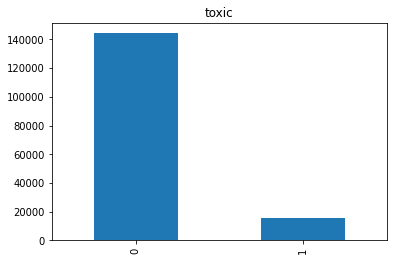

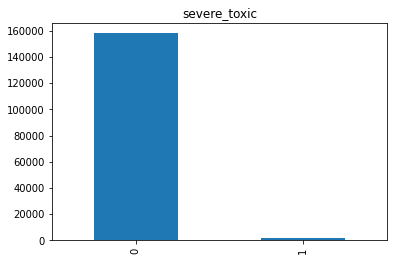

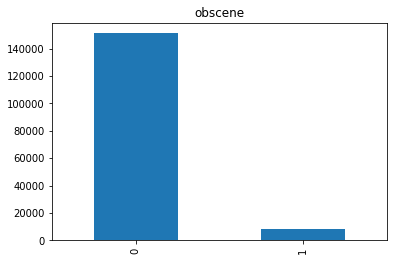

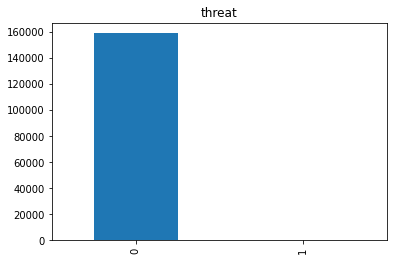

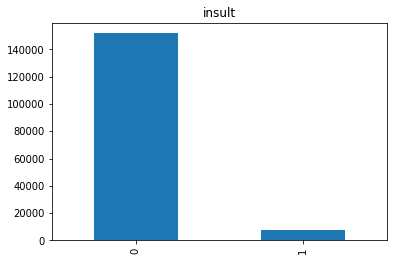

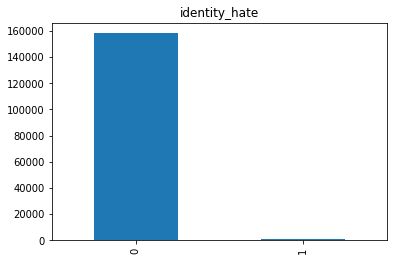

In [12]:
# Visualizing the value counts of each labels 
for col in data.columns[1:]:
  plt.title(col)
  data[col].value_counts().plot(kind = 'bar')
  plt.show()
  

In [13]:
import random 
random_index = random.randint(0 , len(data) - 5) # generate a random indexes
for row in data[['comment_text']][random_index:random_index + 5].itertuples():
  _ , text = row 
  print(f'Text\n {text}\n')
  print('----\n')

Text
 "

Re: Touche
Ah, no actually.  Fadden and Forde might be described as ""interim"", ""short-term"" or ""caretaker"" Prime Ministers, but they were certainly not ""acting"" in a formal sense.  They were both just as much fully Prime Minister as Bob Menzies was, albeit in office for a considerably shorter period.      "

----

Text
 No hurry. I think about blake more and more these days; but it seems like such a monster of a project. And it would be a beast of an FAC. The talk page is heated enough, but at FAC? I shudder to think.

----

Text
 Gay porn photography scandal 

Can someone with editing rights insert a section about how photos came out with riewoldt completely naked, with a shaved groin area, holding his penis about 3cm from his teammates hand? 

thanks in advance.

----

Text
 "

 Yamla the idiot 

If (user.IQ<60)
{
   output="" Yamla detected! bring the axe."";
}"

----

Text
 Your anti-Semitism
I don't appreciate it. Please keep it to yourself.

----



In [35]:
# Creating a dataframe that contains only contains True toxic labels
toxicity_df = pd.DataFrame()
toxicity_df['labels'] = data.columns[1:]
toxicity_df['num_of_true_counts'] = data.iloc[: ,1:].sum().values
toxicity_df.sort_values(['num_of_true_counts'] , inplace = True , ascending = False)
toxicity_df



,labels,num_of_true_counts
0,toxic,15294
2,obscene,8449
4,insult,7877
1,severe_toxic,1595
5,identity_hate,1405
3,threat,478


Alright cool, now we got a dataframe dedicated only for our labels from this we can say there are more toxic comments, followed by obscene comments. 

Will visualize this for better representation. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


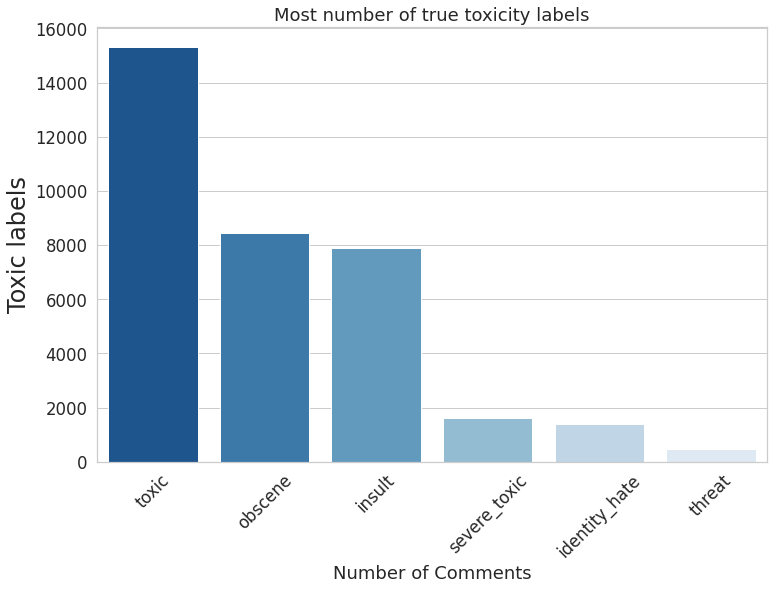

In [48]:
# Most number of true toxicity labels
import seaborn as sns 
plt.figure(figsize = (12 , 8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')

pal = sns.color_palette('Blues_r' , len(toxicity_df))
rank = toxicity_df['num_of_true_counts'].argsort()

sns.barplot(toxicity_df['labels'], toxicity_df['num_of_true_counts'], palette= np.array(pal[::-1])[rank])
plt.title('Most number of true toxicity labels')
plt.ylabel('Toxic labels' , fontsize = 24)
plt.xlabel('Number of Comments' , fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

Ah! that looks amazing and I love blue. So the next step would be visualizing the most common words in the comments using a WordCloud. Have never done this before, let's figure out. 

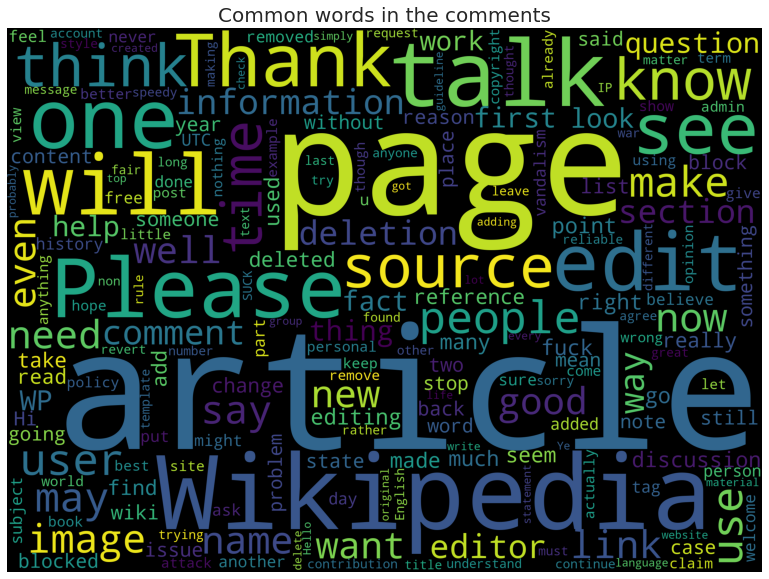

In [54]:
from wordcloud import WordCloud , STOPWORDS
plt.figure(figsize = (20 , 10))
comments = data['comment_text'].values

# Constructing the word cloud 
cloud = WordCloud(
    stopwords = STOPWORDS , 
    background_color = 'black' , 
    collocations = False , 
    width = 2500 , 
    height = 1800
).generate(' '.join(comments))

plt.axis(False)
plt.title('Common words in the comments' , fontsize = 20)
plt.imshow(cloud)

Haha! Look at that we constructed a worldcloud containing most common words in our comments text. And it's quite obvious look at those words why we have more number of toxic comments than other categories of toxicity labels. 